In [1518]:
import pandas as pd
import numpy as np
import fiona

In [1519]:
data=pd.read_csv("/Users/mengxi/Desktop/financial research/211214 - 新版改名字.csv")
data=pd.DataFrame(data)

query_data = data.query('year==2009')
plot_data=query_data[["Regional_key",'ln_gdp','ort_']]

#plot_data['ort'] = plot_data['Gebietseinheit'].str.split(',', n=1).str.get(0)
#plot_data=plot_data.drop(columns=["Gebietseinheit"])

plot_data['Regional_key'] = plot_data['Regional_key'].astype(str)
plot_data['Regional_key'] = np.where(plot_data['Regional_key'].str.len()<5,"0"+plot_data['Regional_key'],plot_data['Regional_key'])

plot_data=plot_data[[ 'ort_','Regional_key','ln_gdp']]
plot_data=plot_data.reset_index().drop(['index'], axis=1)
plot_data.index=plot_data.index+1
plot_data

/Users/mxx/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,ort_,Regional_key,ln_gdp
1,Stuttgart,08111,-8.900452
2,Böblingen,08115,-15.727982
3,Esslingen,08116,-12.950897
4,Göppingen,08117,-9.602726
5,Ludwigsburg,08118,-8.600270
...,...,...,...
398,Saale-Orla-Kreis,16075,-2.780741
399,Greiz,16076,-4.699917
400,Altenburger Land,16077,-3.878990
401,Eisenach,16056,NaN


In [1520]:
#!pip install geopandas


In [1521]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline

In [1522]:
plz_shape_df = gpd.read_file('/Users/mengxi/Desktop/financial research/HAN/statistikportal_geodata_2020/K-2020-AI001-5--AI0109--2021-12-14.shp')

plz_shape_df
plz_shape_df=plz_shape_df.reset_index().drop(['index'], axis=1)
plz_shape_df.index=plz_shape_df.index+1

In [1523]:
plz_shape_df

,id,schluessel,gen,jahr,ai0109,Shape_Leng,Shape_Area,geometry
1,454271,01001,Flensburg,2020,6.5,0.0,0.0,"POLYGON ((526513.753 6075133.412, 526547.941 6..."
2,454272,01002,Kiel,2020,5.5,0.0,0.0,"POLYGON ((575841.570 6032148.032, 575869.668 6..."
3,454273,01003,Lübeck,2020,14.6,0.0,0.0,"POLYGON ((623056.151 5983746.445, 623191.574 5..."
4,454274,01004,Neumünster,2020,4.3,0.0,0.0,"POLYGON ((565015.652 6000637.513, 565128.417 6..."
5,454275,01051,Dithmarschen,2020,3.6,0.0,0.0,"MULTIPOLYGON (((505053.385 6023856.559, 505143..."
...,...,...,...,...,...,...,...,...
397,454667,16073,Saalfeld-Rudolstadt,2020,54.0,0.0,0.0,"POLYGON ((659352.787 5633725.523, 659501.633 5..."
398,454668,16074,Saale-Holzland-Kreis,2020,37.5,0.0,0.0,"POLYGON ((688961.348 5662575.516, 688976.113 5..."
399,454669,16075,Saale-Orla-Kreis,2020,40.8,0.0,0.0,"POLYGON ((699461.667 5630277.321, 699499.253 5..."
400,454670,16076,Greiz,2020,26.1,0.0,0.0,"POLYGON ((724109.327 5650625.772, 724321.912 5..."


In [1524]:
plz_shape_df_1=plz_shape_df[['gen','schluessel']]
plz_shape_df_1

# NaME_2是Regierungsbezirk
# NRW: 54个
# Bayern: 96个
# BW: 44个
# MV: 地图18个 应该有8个 
#    Lkr.Rostock = 189BadDoberan + 191Grüstrow  
#    Lkr.Mechlenburgische Seenplatte = 190Demmin + 194Müritz + 195Mecklenburg-Strelitz + 196NeubrandenburgStädte
#    Lrk.Vorpommern-Greifswald = 192Greifswald + 199Ostvorpommern + 205Uecker-Randow  
#    Lkr.Ludwigslust-Parchim = 193Ludwigslust + 200Parchim  
#    Lkr.Vorpommern-Rügen = 197Nordvorpommern + 201Rügen + 204StralsundStädte
#    Lkr.Nordwestmecklenburg = 198Nordwestmecklenburg + 206WismarStädte
#    Rostock Städte = 202Rostock Städte
#    Schwerin Städte = 203Schwerin Städte
# Hessen: 26个
# Sachsen: 地图28个 应该有13个
#    Lkr. Bautzen = 383Bautzen + 386Kamenz  
#    Lkr. Erzgebirgskreis = 371Annaberg + 372Aue-Schwarzenberg + 376MittlererErzgebirgskreis + 379Stollberg
#    Lkr. Görlitz = 385GörlitzStädte + 387Löbau-Zittau + 389NiederschlesischerOberlausitzkreis
#    Lkr. Leipzig = 396LeipzigerLand + 397Muldentalkreis
#    Lkr. Meißen = 388Meißen + 390Riesa-Großenhain
#    Lkr. Mittelsachsen = 375Freiberg + 377Mittweida + 393Döbeln
#    Lkr. Nordsachsen = 394Delitzsch + 398Torgau-Oschatz
#    Lkr. Säschsische Schweiz-Osterzgebirge = 391SächsischeSchweiz + 392Weißeritzkreis
#    Lkr. Vogtlandkreis = 378PlauenStädte + 380Vogtlandkreis 
#    Lkr. Zwickau = 374ChemnitzerLand + 381ZwickauStädte + 382ZwickauerLand
#    Chemnitz Städte = 373ChemnitzStädte 
#    Dresden Städte = 384DresdenStädte 
#    Leipzig Städte = 395Leipzig Städte
# Niedersachsen: 45个
# Rheinland-Pfalz: 35个
# Sachsen-Anhalt: 地图24个 应该14个
#    Magdeburg Städte = 365MagdeburgStädte
#    Dessau-Roßlau Städte = 350DessauStädte
#    Halle Städte = 355HalleStädte 
#    Lkr. Altmarkkreis Salzwedel = 361AltmarkkreisSalzwedel 
#    Lkr. Anhalt-Bitterfeld = 349Bitterfeld + 351Köthen
#    Lkr. Börde = 362Bördekreis + 36Ohrekreis
#    Lkr. Burgenlandkreis = 354Burgenlandkreis + 360Weißenfels
#    Lkr. Harz = 363Halberstadt + 367Quedlinburg + 370Wernigerode
#    Lkr. Jerichower Land = 364JerichowerLand  
#    Lkr. Mansfeld-Südharz = 355MansfelderLand + 359Sangerhausen 
#    Lkr. Saalekreis = 357Merseburg-Querfurt + 358Saalkreis
#    Lkr. Salzlandkreis = 348Bernburg + 368Schönebeck + 353Aschersleben-Staßfurt
#    Lkr. Stendal = 369Stendal
#    Lkr. Wittenberg = 352Wittenberg + 347Anhalt-Zerbst
#### 353Aschersleben-Staßfurt被Lkr.Harz和Lkr.Salzlandkreis瓜分，根据面积大小，这里放在Lkr.Salzlandkreis
#### 347Anhalt-Zerbst被Dessau-Roßlau Städte，Lkr.Wittenberg，Lkr. Jerichower Land，Lkr. Anhalt-Bitterfeld瓜分，这里放在Lkr.Wittenberg
# Brandenburg: 18个
# Thüringen: 地图22个，统计局数据23个，区别是Eisenach，2021年7月起属于433Wartburgkreis
# 



,gen,schluessel
1,Flensburg,01001
2,Kiel,01002
3,Lübeck,01003
4,Neumünster,01004
5,Dithmarschen,01051
...,...,...
397,Saalfeld-Rudolstadt,16073
398,Saale-Holzland-Kreis,16074
399,Saale-Orla-Kreis,16075
400,Greiz,16076


In [1525]:
# plz_shape_df_1.to_csv(path_or_buf=r'/Users/mengxi/Desktop/financial research/211214-kreasname.csv')

In [1526]:
# plz_shape_df_1['NAME_1'].value_counts()

In [1527]:
# plz_shape_df_2 = plz_shape_df_1.query('NAME_1=="Mecklenburg-Vorpommern"')
# plz_shape_df_2

In [1528]:
# plz_shape_df_2.to_csv(path_or_buf=r'/Users/mengxi/Desktop/financial research/211209 - Kreise in Bayern.csv')

In [1529]:
plz_shape_df=plz_shape_df[['schluessel',  'geometry']]
plz_shape_df=plz_shape_df.rename(columns={'schluessel': 'Regional_key'})



In [1530]:
plz_shape_df

,Regional_key,geometry
1,01001,"POLYGON ((526513.753 6075133.412, 526547.941 6..."
2,01002,"POLYGON ((575841.570 6032148.032, 575869.668 6..."
3,01003,"POLYGON ((623056.151 5983746.445, 623191.574 5..."
4,01004,"POLYGON ((565015.652 6000637.513, 565128.417 6..."
5,01051,"MULTIPOLYGON (((505053.385 6023856.559, 505143..."
...,...,...
397,16073,"POLYGON ((659352.787 5633725.523, 659501.633 5..."
398,16074,"POLYGON ((688961.348 5662575.516, 688976.113 5..."
399,16075,"POLYGON ((699461.667 5630277.321, 699499.253 5..."
400,16076,"POLYGON ((724109.327 5650625.772, 724321.912 5..."


In [1531]:
plot_data

,ort_,Regional_key,ln_gdp
1,Stuttgart,08111,-8.900452
2,Böblingen,08115,-15.727982
3,Esslingen,08116,-12.950897
4,Göppingen,08117,-9.602726
5,Ludwigsburg,08118,-8.600270
...,...,...,...
398,Saale-Orla-Kreis,16075,-2.780741
399,Greiz,16076,-4.699917
400,Altenburger Land,16077,-3.878990
401,Eisenach,16056,NaN


In [1541]:
germany_df = pd.merge(left=plz_shape_df, right=plot_data, on='Regional_key',how='left')

germany_df

,Regional_key,geometry,ort_,ln_gdp
0,01001,"POLYGON ((526513.753 6075133.412, 526547.941 6...",Flensburg,-3.604481
1,01002,"POLYGON ((575841.570 6032148.032, 575869.668 6...","Kiel, Landeshauptstadt",0.768776
2,01003,"POLYGON ((623056.151 5983746.445, 623191.574 5...","Lübeck, Hansestadt",-2.971335
3,01004,"POLYGON ((565015.652 6000637.513, 565128.417 6...",Neumünster,-1.402733
4,01051,"MULTIPOLYGON (((505053.385 6023856.559, 505143...",Dithmarschen,-7.152683
...,...,...,...,...
396,16073,"POLYGON ((659352.787 5633725.523, 659501.633 5...",Saalfeld-Rudolstadt,-10.136827
397,16074,"POLYGON ((688961.348 5662575.516, 688976.113 5...",Saale-Holzland-Kreis,-2.680789
398,16075,"POLYGON ((699461.667 5630277.321, 699499.253 5...",Saale-Orla-Kreis,-2.780741
399,16076,"POLYGON ((724109.327 5650625.772, 724321.912 5...",Greiz,-4.699917


In [1542]:
#data.to_csv(path_or_buf=r'/Users/mengxi/Desktop/financial research/211210 - germany_df.csv')

In [1543]:
germany_df["ln_gdp"].isnull().sum()

4

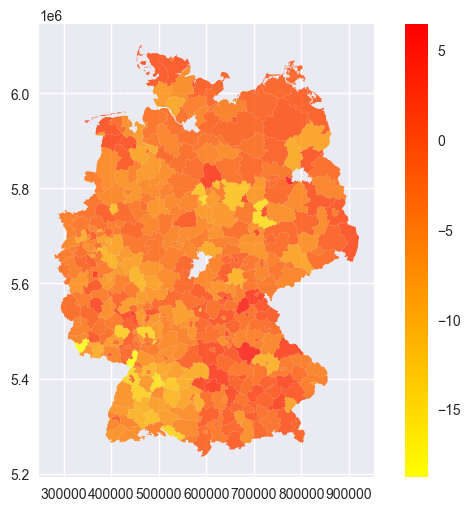

In [1544]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

germany_df.plot(
    ax=ax, 
    column='ln_gdp', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
    alpha=0.8,
);

In [1545]:
fig.savefig('ln_gdp.png')


In [1546]:
germany_df= germany_df.set_index("ort_")

In [1547]:
germany_df["area"] = germany_df.area


In [1548]:
germany_df["area"]
# germany_df['boundary'] = germany_df.boundary
# germany_df['centroid'] = germany_df.centroid




ort_
Flensburg                 4.924786e+07
Kiel, Landeshauptstadt    1.122461e+08
Lübeck, Hansestadt        2.115829e+08
Neumünster                7.182168e+07
Dithmarschen              1.427470e+09
                              ...     
Saalfeld-Rudolstadt       1.008646e+09
Saale-Holzland-Kreis      8.156059e+08
Saale-Orla-Kreis          1.151846e+09
Greiz                     8.464881e+08
Altenburger Land          5.698362e+08
Name: area, Length: 401, dtype: float64

In [1549]:
germany_df

,Regional_key,geometry,ln_gdp,area
ort_,,,,
Flensburg,01001,"POLYGON ((526513.753 6075133.412, 526547.941 6...",-3.604481,4.924786e+07
"Kiel, Landeshauptstadt",01002,"POLYGON ((575841.570 6032148.032, 575869.668 6...",0.768776,1.122461e+08
"Lübeck, Hansestadt",01003,"POLYGON ((623056.151 5983746.445, 623191.574 5...",-2.971335,2.115829e+08
Neumünster,01004,"POLYGON ((565015.652 6000637.513, 565128.417 6...",-1.402733,7.182168e+07
Dithmarschen,01051,"MULTIPOLYGON (((505053.385 6023856.559, 505143...",-7.152683,1.427470e+09
...,...,...,...,...
Saalfeld-Rudolstadt,16073,"POLYGON ((659352.787 5633725.523, 659501.633 5...",-10.136827,1.008646e+09
Saale-Holzland-Kreis,16074,"POLYGON ((688961.348 5662575.516, 688976.113 5...",-2.680789,8.156059e+08
Saale-Orla-Kreis,16075,"POLYGON ((699461.667 5630277.321, 699499.253 5...",-2.780741,1.151846e+09


<AxesSubplot:>

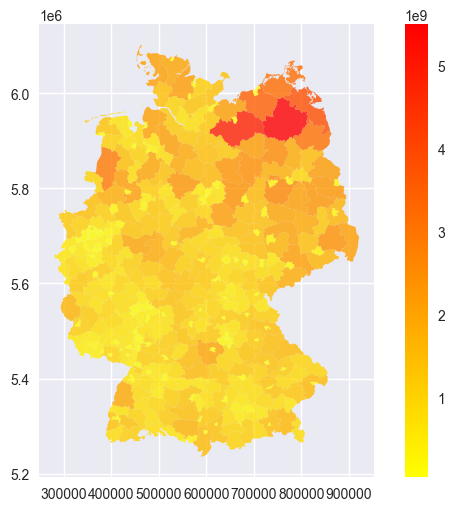

In [1550]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)


germany_df.plot(ax=ax, 
    column='area', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
    alpha=0.8)
# germany_df["centroid"].plot(ax=ax, color="black")
